### Importamos librerias

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Parte 1

### Ejercicio 1

In [156]:
datos_calorias = pd.read_csv('calorias.txt',
                           encoding='latin1',
                           sep='\t',
                           skiprows=11,
                           names=['id', 'duracion_min', 'distancia_km', 'actividad', 'calorias_quemadas'],
                           decimal=',')
datos_personas=pd.read_excel('personas.xlsx')

In [157]:
datos_calorias.head()

,id,duracion_min,distancia_km,actividad,calorias_quemadas
0,1,10.18,4.2,correr,241.3
1,2,5.36,3.4,caminar,201.5
2,3,22.08,2.4,trotar,258.7
3,4,14.02,6.9,trotar,242.9
4,5,20.73,4.7,correr,296.7


In [158]:
datos_calorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 685 non-null    int64  
 1   duracion_min       685 non-null    float64
 2   distancia_km       685 non-null    float64
 3   actividad          685 non-null    object 
 4   calorias_quemadas  685 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 26.9+ KB


In [159]:
datos_personas.head()

,id_persona,peso_kg,edad_anios
0,1,70,32
1,2,54,28
2,3,76,27
3,4,66,27
4,5,61,29


In [160]:
datos_personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_persona  685 non-null    int64
 1   peso_kg     685 non-null    int64
 2   edad_anios  685 non-null    int64
dtypes: int64(3)
memory usage: 16.2 KB


Primero vamos a hacer un merge y despues vamos a trabajar los nulos y valores faltantes. Ya corroboramos que los datos numericos son datos numericos y no strings.

In [161]:
df_merged=pd.merge(datos_calorias, datos_personas, left_on='id', right_on='id_persona', how='inner')
df_merged.head()

,id,duracion_min,distancia_km,actividad,calorias_quemadas,id_persona,peso_kg,edad_anios
0,1,10.18,4.2,correr,241.3,1,70,32
1,2,5.36,3.4,caminar,201.5,2,54,28
2,3,22.08,2.4,trotar,258.7,3,76,27
3,4,14.02,6.9,trotar,242.9,4,66,27
4,5,20.73,4.7,correr,296.7,5,61,29


Podemos ver que ahora tenemos 2 id por ende vamos a eliminar id_persona

In [162]:
df_merged = df_merged.drop('id_persona', axis=1)
df_merged.head()

,id,duracion_min,distancia_km,actividad,calorias_quemadas,peso_kg,edad_anios
0,1,10.18,4.2,correr,241.3,70,32
1,2,5.36,3.4,caminar,201.5,54,28
2,3,22.08,2.4,trotar,258.7,76,27
3,4,14.02,6.9,trotar,242.9,66,27
4,5,20.73,4.7,correr,296.7,61,29


In [163]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 685 non-null    int64  
 1   duracion_min       685 non-null    float64
 2   distancia_km       685 non-null    float64
 3   actividad          685 non-null    object 
 4   calorias_quemadas  685 non-null    float64
 5   peso_kg            685 non-null    int64  
 6   edad_anios         685 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 37.6+ KB


In [164]:
df_merged.drop_duplicates()
df_merged.dropna()

,id,duracion_min,distancia_km,actividad,calorias_quemadas,peso_kg,edad_anios
0,1,10.18,4.2,correr,241.3,70,32
1,2,5.36,3.4,caminar,201.5,54,28
2,3,22.08,2.4,trotar,258.7,76,27
3,4,14.02,6.9,trotar,242.9,66,27
4,5,20.73,4.7,correr,296.7,61,29
...,...,...,...,...,...,...,...
680,681,17.35,4.9,correr,306.2,68,29
681,682,10.36,6.3,trotar,259.6,64,31
682,683,1.52,7.2,trotar,278.2,64,25
683,684,2.58,6.9,caminar,245.0,61,32


In [165]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 685 non-null    int64  
 1   duracion_min       685 non-null    float64
 2   distancia_km       685 non-null    float64
 3   actividad          685 non-null    object 
 4   calorias_quemadas  685 non-null    float64
 5   peso_kg            685 non-null    int64  
 6   edad_anios         685 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 37.6+ KB


Primero que nada vamos a hacer un encoding en las actividades asi podemos trabajar mejor las cantidades de actividades.


In [166]:
df_merged = pd.get_dummies(df_merged, columns=['actividad'], dtype=int)

In [167]:
df_merged

,id,duracion_min,distancia_km,calorias_quemadas,peso_kg,edad_anios,actividad_Caminar,actividad_caminar,actividad_correr,actividad_trotar
0,1,10.18,4.2,241.3,70,32,0,0,1,0
1,2,5.36,3.4,201.5,54,28,0,1,0,0
2,3,22.08,2.4,258.7,76,27,0,0,0,1
3,4,14.02,6.9,242.9,66,27,0,0,0,1
4,5,20.73,4.7,296.7,61,29,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
680,681,17.35,4.9,306.2,68,29,0,0,1,0
681,682,10.36,6.3,259.6,64,31,0,0,0,1
682,683,1.52,7.2,278.2,64,25,0,0,0,1
683,684,2.58,6.9,245.0,61,32,0,1,0,0


Como tenemos 2 actividades iguales vamos a unificarlo, haciendo un or por ende va a tomar solo el valor true

In [168]:
df_merged['actividad_caminar'] = df_merged['actividad_Caminar'] | df_merged['actividad_caminar']
df_merged['actividad_caminar'] = df_merged['actividad_caminar'].astype(int)

df_merged = df_merged.drop('actividad_Caminar', axis=1)

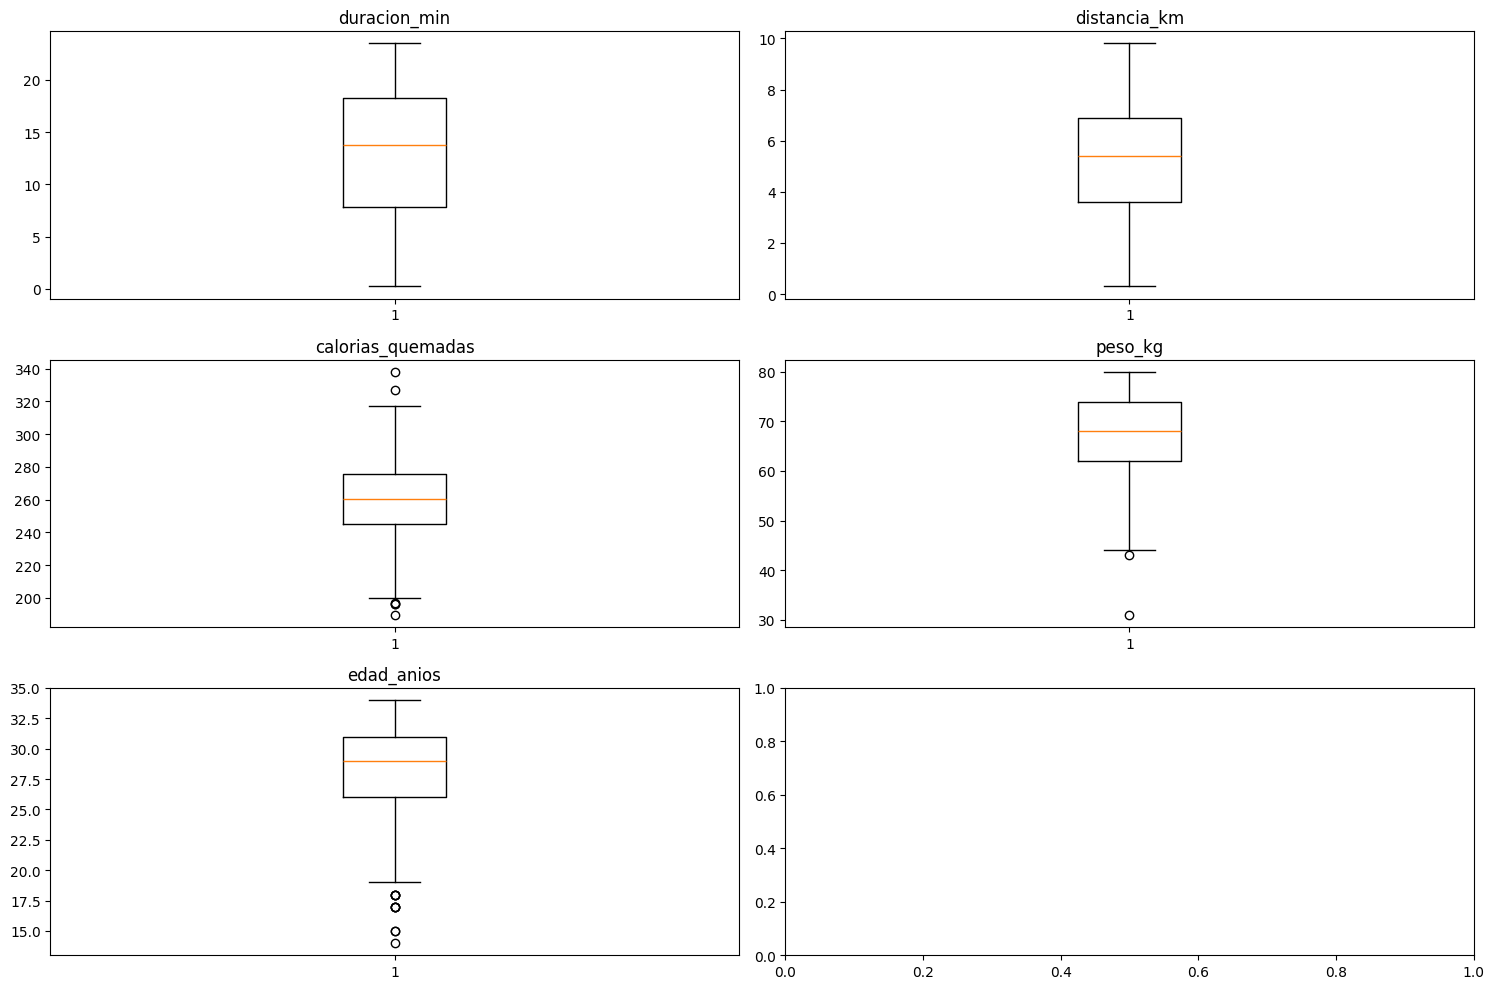

In [169]:
cols = df_merged.columns[1:6]

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
   if i < len(axes):
       axes[i].boxplot(df_merged[col].dropna())
       axes[i].set_title(col)

plt.tight_layout()
plt.show()


En estos boxplots podemos ver un par de outliers, en los cuales tienen sentido, que una persona de 15 años haga alguna de estas actividades, pero por ejemplo que una persona pese 30 kilos no es muy normal en el caso de nuestro dataset.

### Ejercicio 2

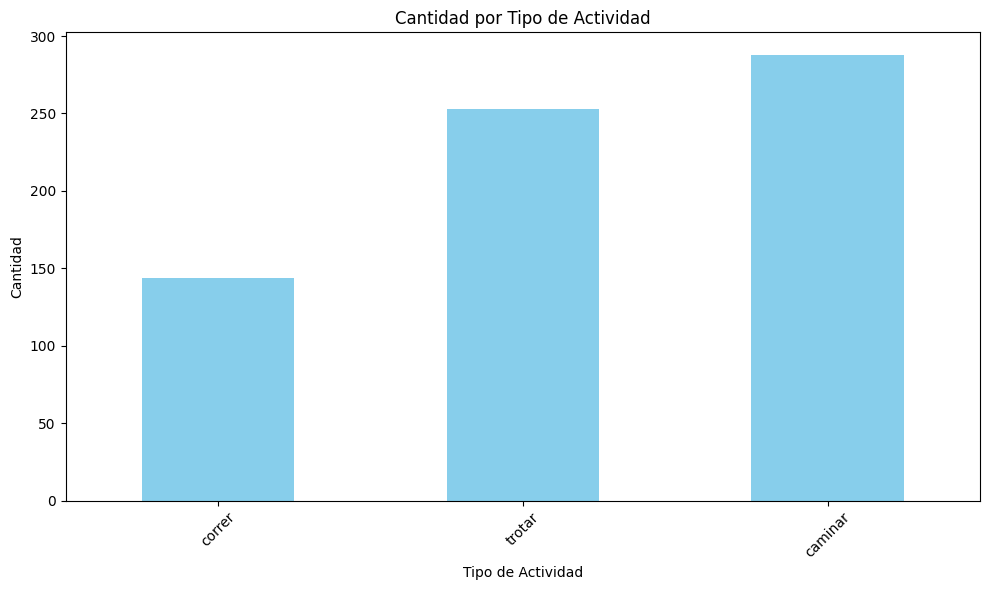

In [170]:
columnas_actividad = ['actividad_caminar', 'actividad_correr', 'actividad_trotar']

suma_caminar = df_merged['actividad_caminar'].sum()
suma_correr = df_merged['actividad_correr'].sum()
suma_trotar = df_merged['actividad_trotar'].sum()

suma_actividades = pd.Series({
    'caminar': suma_caminar,
    'correr': suma_correr,
    'trotar': suma_trotar
})

suma_actividades = suma_actividades.sort_values(ascending=True)

suma_actividades.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cantidad por Tipo de Actividad')
plt.xlabel('Tipo de Actividad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [171]:
suma_caminar = df_merged['actividad_caminar'].sum()
suma_correr = df_merged['actividad_correr'].sum()
suma_trotar = df_merged['actividad_trotar'].sum()

total_actividades = suma_caminar + suma_correr + suma_trotar

porcentaje_caminar = round((suma_caminar / total_actividades) * 100, 1)
print(f'La actividad mas frecuente es caminar con un {porcentaje_caminar}%')


La actividad mas frecuente es caminar con un 42.0%


### Ejercicio 3

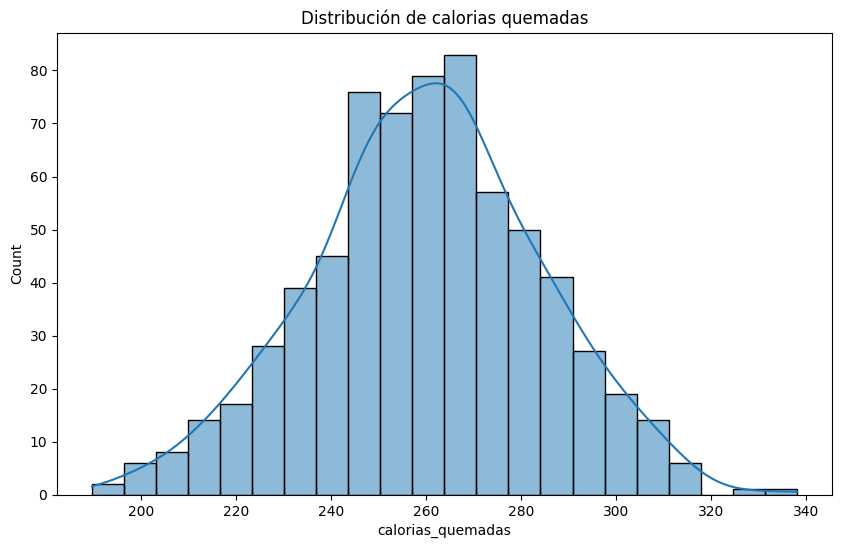

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='calorias_quemadas', kde=True)
plt.title('Distribución de calorias quemadas')
plt.show()

Podemos ver que nuestro grafico tiene una distribucion que tiende a ser normal, por ende no podemos negar su normalidad.

### Ejercicio 4

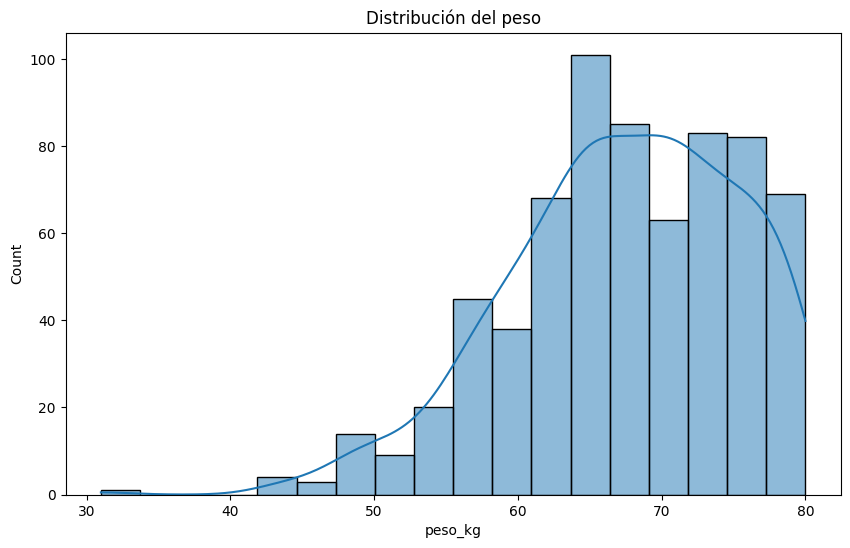

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merged, x='peso_kg', kde=True)
plt.title('Distribución del peso')
plt.show()

In [174]:
print('Mediana',df_merged['peso_kg'].median())
print('Moda',df_merged['peso_kg'].mode())
print('Media',df_merged['peso_kg'].mean())


Mediana 68.0
Moda 0    66
Name: peso_kg, dtype: int64
Media 67.41167883211679


Podemos ver que nuestra distribucion del peso de las personas esta asimetrica hacia la izquierda, debido a esto nos conviene usar la mediana ya que:
- Es mejor cuando tenemos outliers, de la cola izquierda, en este caso esta el de 30kg que podriamos eliminarlo tranquilamente, ya que sabemos que no es algo posible.
- Nos da mejor el centro cuando hay asimetria
- Es mejor que la media como podemos ver comparando la media mediana y moda.

### Ejercicio 5

In [175]:
df_merged.corr()

,id,duracion_min,distancia_km,calorias_quemadas,peso_kg,edad_anios,actividad_caminar,actividad_correr,actividad_trotar
id,1.000000,-0.033031,0.019041,0.063979,-0.062868,0.019462,-0.059045,0.078851,-0.006180
duracion_min,-0.033031,1.000000,-0.018079,0.365987,0.072407,-0.034013,-0.022771,0.041527,-0.011769
distancia_km,0.019041,-0.018079,1.000000,0.363477,-0.050894,-0.022974,0.004892,-0.011183,0.004438
calorias_quemadas,0.063979,0.365987,0.363477,1.000000,-0.001139,-0.002609,-0.475386,0.372075,0.172094
peso_kg,-0.062868,0.072407,-0.050894,-0.001139,1.000000,0.017784,0.040589,-0.037082,-0.010208
edad_anios,0.019462,-0.034013,-0.022974,-0.002609,0.017784,1.000000,-0.034594,0.035556,0.005365
actividad_caminar,-0.059045,-0.022771,0.004892,-0.475386,0.040589,-0.034594,1.000000,-0.439424,-0.651808
actividad_correr,0.078851,0.041527,-0.011183,0.372075,-0.037082,0.035556,-0.439424,1.000000,-0.394822
actividad_trotar,-0.006180,-0.011769,0.004438,0.172094,-0.010208,0.005365,-0.651808,-0.394822,1.000000


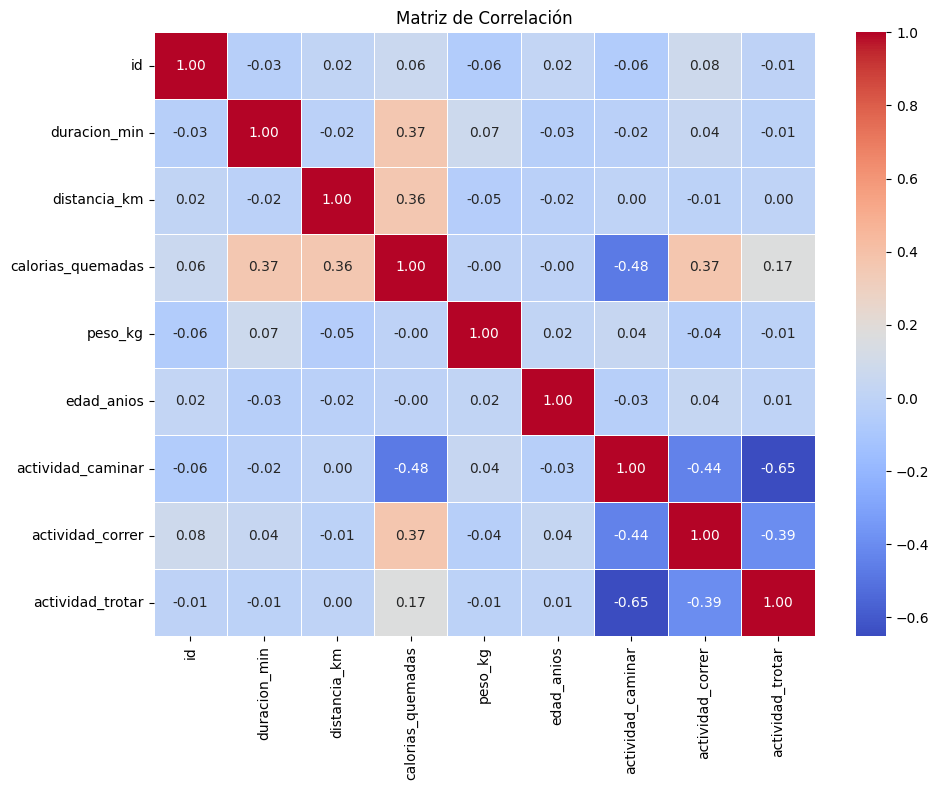

In [176]:
corr_matrix = df_merged.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Correlaciones mas relacionadas:

actividad_caminar y calorias_quemadas: correlacion negativa moderada
- Esto es negativo ya que caminando quemamos menos calorias que corriendo o trotando.

calorias_quemadas y duracion_min: correlacion positiva moderada
- Mas tiempo haces una actividad mas calorias vas a quemar.

calorias_quemadas y distancia_km: correlacion positiva moderada
- Muestra que recorrer más distancia se asocia con mayor quema de calorías.

calorias_quemadas y actividad_correr: 0.37 (correlacion positiva moderada)
- Si corremos vamos a tener una mayor quema de calorias que si caminamos o trotamos siempre y cuando el tiempo sea similar, ya que no es lo mismo correr 5 minutos que caminar 30-40 minutos.

En el caso de las 3 actividades tienen una correlacion negativa moderada pero porque cuando pasa una no pasa la otra por ende siempre va a tener una exclusion.

Las variables menos relacionadas osea las cercanas a 0:
distancia_km y actividad_caminar
distancia_km y actividad_trotar
peso_kg y calorias_quemadas

### Ejercicio 6

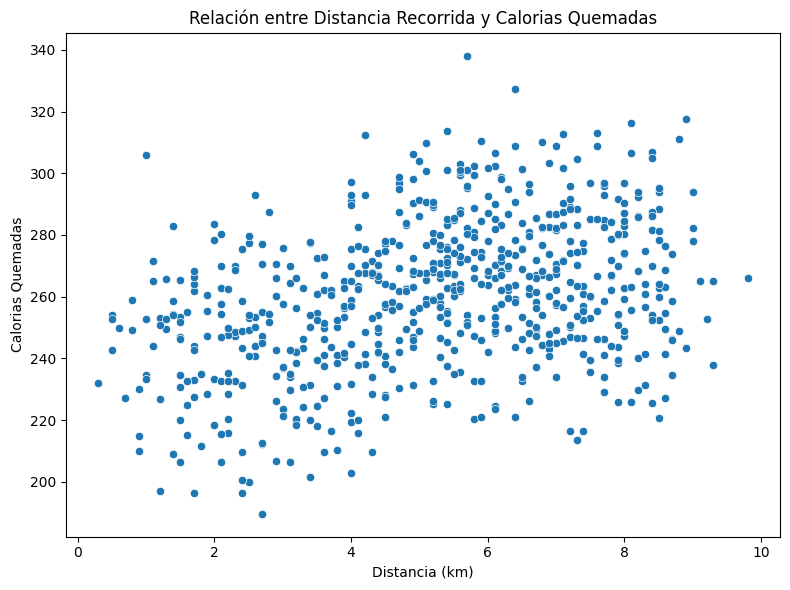

In [177]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distancia_km', y='calorias_quemadas', data=df_merged)
plt.title('Relación entre Distancia Recorrida y Calorias Quemadas')
plt.xlabel('Distancia (km)')
plt.ylabel('Calorias Quemadas')

plt.tight_layout()
plt.show()

## Parte 2

In [178]:
X = df_merged.drop(['calorias_quemadas', 'id'], axis=1)
X = sm.add_constant(X)
y = df_merged['calorias_quemadas']

In [179]:
modelo = sm.OLS(y, X).fit()

In [180]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      calorias_quemadas   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     122.8
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          7.50e-105
Time:                        19:24:47   Log-Likelihood:                -2896.5
No. Observations:                 685   AIC:                             5807.
Df Residuals:                     678   BIC:                             5839.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               165.4243      5.54

Podemos ver como las variables peso_kg y edad_años tiene un pValue mayor al 5% por ende las vamos a descartar de nuestro modelo. Todas las otras variables vemos que contribuyen significativamente.

In [ ]:

pvalues = modelo.pvalues
variables_no_significativas = pvalues[pvalues > 0.05].index.tolist()
print(f"Variables no significativas (p > 0.05): {variables_no_significativas}")

X_final = X.drop(columns=variables_no_significativas)

modelo_final = sm.OLS(y, X_final).fit()
print(modelo_final.summary())

Variables no significativas (p > 0.05): ['peso_kg', 'edad_anios']
                            OLS Regression Results                            
Dep. Variable:      calorias_quemadas   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          4.76e-107
Time:                        19:26:06   Log-Likelihood:                -2896.7
No. Observations:                 685   AIC:                             5803.
Df Residuals:                     680   BIC:                             5826.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Ejercicio 2A

Tenemos la siguiente ecuacion para calcular la prediccion:

**167.36 + 1.37 * duracion + 4.19 * distancia_km + 39.55 * act_cam + 69.57 * act_corr + 58.23 * act_trot**


Cada variable significa lo siguiente:

- Por cada minuto de duracion va a haber un aumento de 1.37cal
- Por cada km de distancia va a haber un aumento de 4.19cal
- Cada vez que se realiza la actividad de caminar va a haber un aumento de 39.55cal
- Cada vez que se realiza la actividad de correr va a haber un aumento de 69.57cal
- Cada vez que se realiza la actividad de trotar va a haber un aumento de 58.23cal

### Ejercicio 2B

Puedo usar R2, R2 ajustado y otras metricas mas.

In [192]:
r_cuadrado = modelo.rsquared
r_cuadrado_final = modelo_final.rsquared

In [193]:
print(r_cuadrado)
print(r_cuadrado_final)

0.5208616293132224
0.5206328543893928


Segun los valores de R2 el primer modelo osea el modelo orignal con todas las variables es mejor ya que es mas grande que el modelo final/ajustado

### Ejercicio 2C

In [190]:
df_merged['calorias_predichas']= modelo.predict(X)

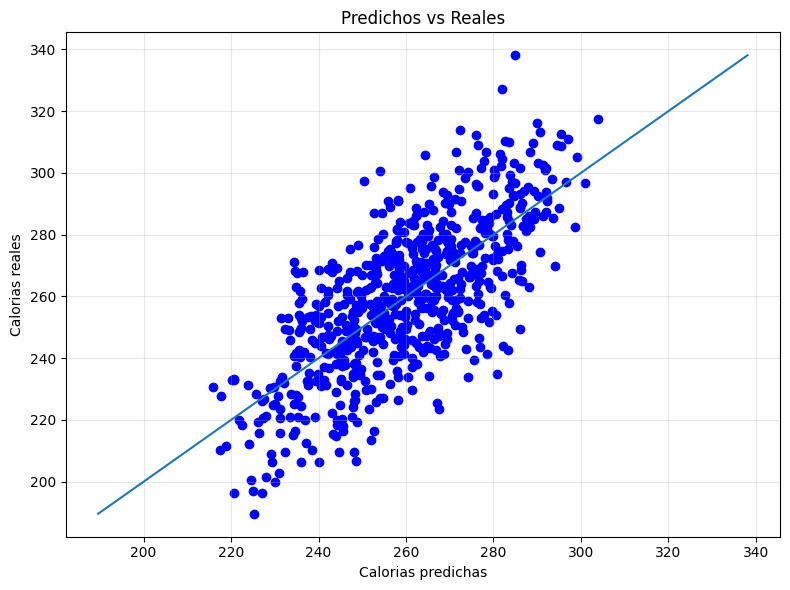

In [191]:
plt.figure(figsize=(8, 6))

plt.scatter(df_merged['calorias_predichas'], df_merged['calorias_quemadas'], color='blue')

min_val = min(df_merged['calorias_predichas'].min(), df_merged['calorias_quemadas'].min())
max_val = max(df_merged['calorias_predichas'].max(), df_merged['calorias_quemadas'].max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel('Calorias predichas')
plt.ylabel('Calorias reales')
plt.title('Predichos vs Reales')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Podemos ver que el modelo parece tener un rendimiento bueno, ya que si bien en algunos puntos el valor real esta por encima y a veces por debajo.